### Quick visualizations for parameter sets found using the evolutionary algorithm

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'arial'
# rcParams['font.sans-serif'] = ['Tahoma']
rcParams.update({'font.size': 16})

In [2]:
runs = np.array(pickle.load(open('BT_030421_Fixedk3.pickled','rb')))


<ipython-input-2-b6b1c9cdded1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  runs = np.array(pickle.load(open('BT_030421_Fixedk3.pickled','rb')))


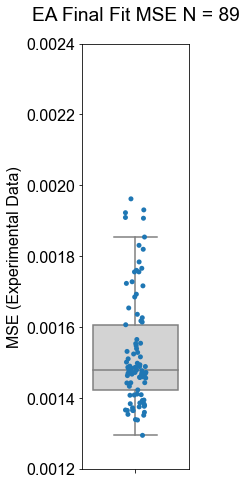

In [3]:
plt.figure(figsize=(3,7))
sns.stripplot(y=runs[:,0,-1],orient='vertical')
sns.boxplot(y=runs[:,0,-1],color='lightgray',showfliers=False)

plt.ylim([0.0012,0.0024])
plt.title('EA Final Fit MSE N = 89',y=1.04)
plt.ylabel('MSE (Experimental Data)')

plt.tight_layout()
# plt.savefig('EA_010421_FinalMSE.png',dpi=150)

In [4]:
med_score = np.median(runs[:,0,-1])
runs_better_than_med_score = np.unique(runs[:,0,:][runs[:,0,:] < med_score])
runs_better_than_med_params = runs[:,1,:][runs[:,0,:] < med_score]
runs_better_than_med_params = np.reshape(np.stack(runs_better_than_med_params,axis=0), \
                                         (len(runs_better_than_med_params),7))
runs_better_than_med_params = np.unique(runs_better_than_med_params,axis=0)


In [7]:
best = runs[np.argmin(runs[:,0,-1]),1,-1]
best = np.around(best,2)

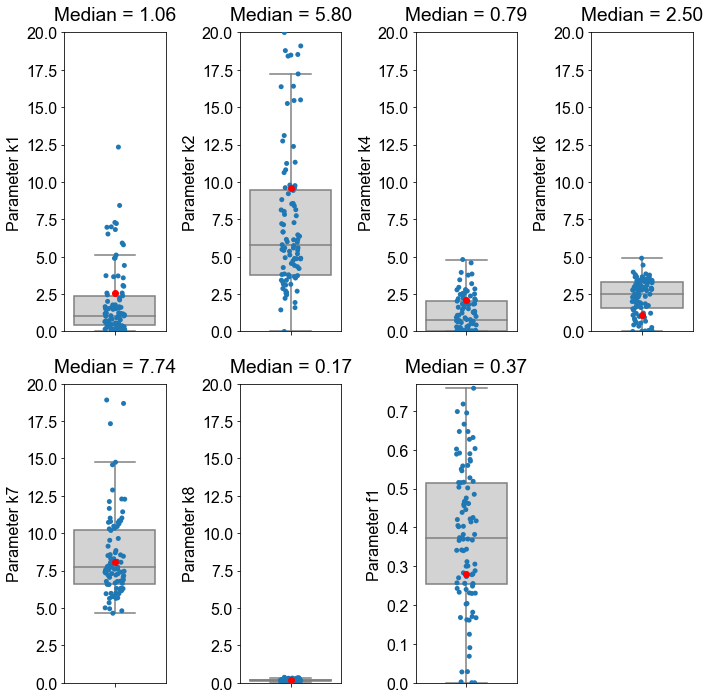

In [8]:
names = ['k1','k2','k4','k6','k7','k8','f1']

pmed = []
plt.figure(figsize=(10,10))
for i in range(7):
    plt.subplot(2,4,i+1)
    p = [params[i] for params in runs[:,1,-1]]
    pmed.append(np.median(p))
    plt.title('Median = %.2f' %np.median(p),y=1.02)
    sns.stripplot(y=p,orient='vertical')
    sns.boxplot(y=p,color='lightgray',showfliers=0)
    plt.ylim([0,20])
    if i == 6:
        plt.ylim([0,0.77])
    plt.ylabel('Parameter %s' %names[i])
    plt.scatter(x=0,y=best[i],c='red',zorder=10)
    plt.tight_layout()